In [76]:
import pandas as pd

In [77]:
import numpy as np

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
pd.set_option('precision',3)
pd.options.display.max_columns = 999
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

In [80]:
data = pd.read_csv('train - train.csv')

In [82]:
data['i'] = data.index

In [83]:
data.head(5)

,v,t,distance,rating,car_or_bus,i
0,19.211,0.138,2.652,3,car,0
1,30.848,0.171,5.290,3,car,1
2,13.560,0.068,0.918,3,bus,2
3,19.767,0.390,7.700,3,bus,3
4,25.807,0.155,3.995,2,car,4


In [84]:
features = list(data.columns)

In [85]:
features = [x for x in features if x not in ['car_or_bus']]

In [86]:
features

['v', 't', 'distance', 'rating', 'i']

In [87]:
X, y = data[features], data['car_or_bus'].map({'car':0, 'bus':1})

In [88]:
X.head()

,v,t,distance,rating,i
0,19.211,0.138,2.652,3,0
1,30.848,0.171,5.290,3,1
2,13.560,0.068,0.918,3,2
3,19.767,0.390,7.700,3,3
4,25.807,0.155,3.995,2,4


In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Зафиксируем разбиение для повторяемости кода: random_state

In [203]:
print (y_train.head(), y_test.head())

96     1
105    0
66     0
0      0
122    0
Name: car_or_bus, dtype: int64 73     0
18     1
118    1
78     1
76     0
Name: car_or_bus, dtype: int64


In [91]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=5, random_state=0, n_jobs=-1).fit(X, y)

# фиксируем повторяемость : random_state
# кол-во фолдов : см
# кол-во процессоров : n_jobs (все)

In [92]:
# Как напредсказывали?

list_ones = []
list_zeros = []

for i,j in zip(clf.predict_proba(X)[:,1], np.array(y)):
    if j==0: list_zeros.append((round(i,2),j))
    else: list_ones.append((round(i,2),j))

In [93]:
list_ones[:5], list_ones[-5:] 

([(0.33, 1), (0.31, 1), (0.33, 1), (0.33, 1), (0.36, 1)],
 [(0.69, 1), (0.64, 1), (0.64, 1), (0.69, 1), (0.7, 1)])

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy_score(clf.predict(X), y)

0.6533333333333333

# Давайте градиентный бустинг! Самое вроде лучшее ! Сравним !

In [54]:
! pip install xgboost

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [55]:
! pip install PyHamcrest

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [96]:
import xgboost as xgb 

In [97]:
with open(xgb.VERSION_FILE) as v:
    print (v.read())

0.81



In [98]:
# Будем использовать "родной" формат xgb

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

In [99]:
d_X = xgb.DMatrix(X, label=y)

In [100]:
param = {'max_depth': 2, 'eta': 1, 'silent': 1, 'objective': 'binary:logistic'}
# param = {'max_depth': 2, 'eta': 0.038, 'silent': 1, 'objective': 'binary:logistic'}

# 'max_depth': 2, глубина дерева, по умолчанию
# 'eta': 1, шаг обучения, по умолчанию ПОКА
# 'silent': 1, инфа о процессе, да
# 'objective': 'binary:logistic', целевая функция - бинарная классификация

param['nthread'] = 8 # кол-во процессоров

In [101]:
param['eval_metric'] = 'error' # оптимизация по 1-accuracy (доли неправильных ответов)

In [102]:
evallist = [(d_test, 'test'), (d_train, 'train')] # что печатать в процессе обучения - метрику для теста и трейна 

In [103]:
evallist2 = [(d_X, 'train')] # когда учися на всем, теста нет 

In [37]:
param['num_round'] = 100 # Сколько деревьев, сколько "шагов"

In [39]:
bst = xgb.train(param, d_train, param['num_round'], evallist)

[0]	eval-error:0.26	train-error:0.2
[1]	eval-error:0.36	train-error:0.15
[2]	eval-error:0.26	train-error:0.17
[3]	eval-error:0.28	train-error:0.11
[4]	eval-error:0.28	train-error:0.12
[5]	eval-error:0.32	train-error:0.09
[6]	eval-error:0.26	train-error:0.08
[7]	eval-error:0.3	train-error:0.08
[8]	eval-error:0.32	train-error:0.05
[9]	eval-error:0.3	train-error:0.04
[10]	eval-error:0.3	train-error:0.04
[11]	eval-error:0.28	train-error:0.02
[12]	eval-error:0.26	train-error:0.02
[13]	eval-error:0.3	train-error:0.03
[14]	eval-error:0.28	train-error:0.02
[15]	eval-error:0.3	train-error:0
[16]	eval-error:0.32	train-error:0
[17]	eval-error:0.32	train-error:0.01
[18]	eval-error:0.32	train-error:0.02
[19]	eval-error:0.34	train-error:0
[20]	eval-error:0.34	train-error:0
[21]	eval-error:0.32	train-error:0
[22]	eval-error:0.34	train-error:0
[23]	eval-error:0.3	train-error:0
[24]	eval-error:0.32	train-error:0
[25]	eval-error:0.32	train-error:0
[26]	eval-error:0.32	train-error:0
[27]	eval-error:0.3	t

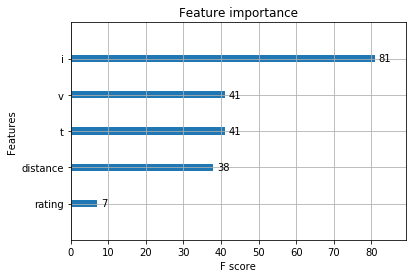

In [40]:
xgb.plot_importance(bst)

In [42]:
bst.predict(d_test)

array([ 0.090,  0.020,  0.997,  0.030,  0.002,  0.007,  0.002,  0.996,
        0.000,  0.486,  0.203,  0.460,  0.019,  0.554,  0.826,  0.005,
        0.098,  0.000,  0.973,  0.097,  0.240,  0.995,  0.742,  0.991,
        0.821,  0.986,  0.905,  0.995,  0.044,  0.240,  0.850,  0.031,
        0.002,  0.352,  0.841,  0.771,  0.964,  0.964,  0.000,  0.948,
        0.178,  0.915,  0.778,  0.978,  0.426,  0.618,  0.795,  0.915,
        0.002,  0.016], dtype=float32)

In [43]:
y_pred = (bst.predict(d_test)>=0.5).astype(int)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0])

In [44]:
accuracy_score(y_pred, y_test) # 1 - 0.32 :)

0.68

In [78]:
res = xgb.cv(param, d_X, num_boost_round=param['num_round'], nfold=15, 

             metrics={'error'}, seed=0,

             callbacks=[xgb.callback.print_evaluation(show_stdv=False),
                        xgb.callback.early_stop(60)])

# 

[0]	train-error:0.227619	test-error:0.28
Multiple eval metrics have been passed: 'test-error' will be used for early stopping.

Will train until test-error hasn't improved in 60 rounds.
[1]	train-error:0.207619	test-error:0.28
[2]	train-error:0.17619	test-error:0.306667
[3]	train-error:0.148571	test-error:0.306667
[4]	train-error:0.125238	test-error:0.293333
[5]	train-error:0.115238	test-error:0.266667
[6]	train-error:0.0980951	test-error:0.266667
[7]	train-error:0.0890475	test-error:0.286667
[8]	train-error:0.0799999	test-error:0.28
[9]	train-error:0.0709524	test-error:0.266667
[10]	train-error:0.0671428	test-error:0.286667
[11]	train-error:0.0609525	test-error:0.273333
[12]	train-error:0.052381	test-error:0.306667
[13]	train-error:0.047619	test-error:0.3
[14]	train-error:0.0442856	test-error:0.293333
[15]	train-error:0.0380951	test-error:0.266667
[16]	train-error:0.0347618	test-error:0.28
[17]	train-error:0.0314285	test-error:0.28
[18]	train-error:0.0295238	test-error:0.28
[19]	train

In [62]:
res.columns

Index(['train-error-mean', 'train-error-std', 'test-error-mean',
       'test-error-std'],
      dtype='object')

In [79]:
res[res['test-error-mean'] == res['test-error-mean'].min()]

,train-error-mean,train-error-std,test-error-mean,test-error-std
40,0.0,0.0,0.24,0.15
46,0.0,0.0,0.24,0.14
49,0.0,0.0,0.24,0.14


In [80]:
1 - 0.24 # Более точная accuracy

0.76

# Давайте сделаем интересные фичи!

In [219]:


# Например, возьмем корень:

power = 1/2

In [220]:
data['v2'] = data['v']**power
data['t2'] = data['t']**power
data['d2'] = data['distance']**power

# 'Ctrl-/' - перключить комменты

In [224]:
features = list(data.columns)

In [225]:
features = [x for x in features if x not in ['car_or_bus']]

In [226]:
features

['v', 't', 'distance', 'rating', 'i', 'v2', 't2', 'd2']

In [144]:
data[features].head()

,v,t,distance,rating,i,v2,t2,d2
0,19.211,0.138,2.652,3,0,4.383,0.372,1.628
1,30.848,0.171,5.290,3,1,5.554,0.414,2.300
2,13.560,0.068,0.918,3,2,3.682,0.260,0.958
3,19.767,0.390,7.700,3,3,4.446,0.624,2.775
4,25.807,0.155,3.995,2,4,5.080,0.393,1.999


In [145]:
X, y = data[features], data['car_or_bus'].map({'car':0, 'bus':1})

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Зафиксируем разбиение для повторяемости кода: random_state

In [192]:
d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

In [193]:
d_X = xgb.DMatrix(X, label=y)

In [154]:
bst = xgb.train(param, d_train, param['num_round'], evallist)

[0]	eval-error:0.26	train-error:0.2
[1]	eval-error:0.36	train-error:0.15
[2]	eval-error:0.26	train-error:0.17
[3]	eval-error:0.28	train-error:0.11
[4]	eval-error:0.28	train-error:0.12
[5]	eval-error:0.32	train-error:0.09
[6]	eval-error:0.26	train-error:0.08
[7]	eval-error:0.3	train-error:0.08
[8]	eval-error:0.32	train-error:0.05
[9]	eval-error:0.3	train-error:0.04
[10]	eval-error:0.3	train-error:0.04
[11]	eval-error:0.28	train-error:0.02
[12]	eval-error:0.26	train-error:0.02
[13]	eval-error:0.3	train-error:0.03
[14]	eval-error:0.28	train-error:0.02
[15]	eval-error:0.3	train-error:0
[16]	eval-error:0.32	train-error:0
[17]	eval-error:0.32	train-error:0.01
[18]	eval-error:0.32	train-error:0.02
[19]	eval-error:0.34	train-error:0
[20]	eval-error:0.34	train-error:0
[21]	eval-error:0.32	train-error:0
[22]	eval-error:0.34	train-error:0
[23]	eval-error:0.3	train-error:0
[24]	eval-error:0.32	train-error:0
[25]	eval-error:0.32	train-error:0
[26]	eval-error:0.32	train-error:0
[27]	eval-error:0.3	t

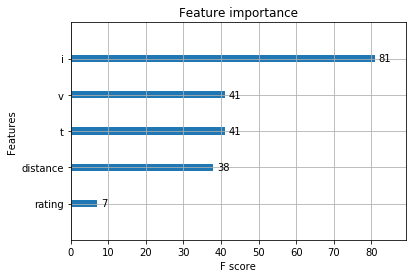

In [155]:
xgb.plot_importance(bst)

In [158]:
accuracy_score(y_pred, y_test) # 1 - 0.32 :)

0.68

In [159]:
res = xgb.cv(param, d_X, num_boost_round=param['num_round'], nfold=15, 

             metrics={'error'}, seed=0,

             callbacks=[xgb.callback.print_evaluation(show_stdv=False),
                        xgb.callback.early_stop(60)])


[0]	train-error:0.227619	test-error:0.28
Multiple eval metrics have been passed: 'test-error' will be used for early stopping.

Will train until test-error hasn't improved in 60 rounds.
[1]	train-error:0.207619	test-error:0.28
[2]	train-error:0.17619	test-error:0.306667
[3]	train-error:0.148571	test-error:0.306667
[4]	train-error:0.125238	test-error:0.293333
[5]	train-error:0.115238	test-error:0.266667
[6]	train-error:0.0980951	test-error:0.266667
[7]	train-error:0.0890475	test-error:0.286667
[8]	train-error:0.0799999	test-error:0.28
[9]	train-error:0.0709524	test-error:0.266667
[10]	train-error:0.0671428	test-error:0.286667
[11]	train-error:0.0609525	test-error:0.273333
[12]	train-error:0.052381	test-error:0.306667
[13]	train-error:0.047619	test-error:0.3
[14]	train-error:0.0442856	test-error:0.293333
[15]	train-error:0.0380951	test-error:0.266667
[16]	train-error:0.0347618	test-error:0.28
[17]	train-error:0.0314285	test-error:0.28
[18]	train-error:0.0295238	test-error:0.28
[19]	train

In [160]:
res[res['test-error-mean'] == res['test-error-mean'].min()]

,train-error-mean,train-error-std,test-error-mean,test-error-std
40,0.0,0.0,0.24,0.15
46,0.0,0.0,0.24,0.14
49,0.0,0.0,0.24,0.14


In [161]:
1 - 0.24 # Более точная accuracy

0.76

# Tune params!

## Restart notebook because of xgb cache 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('precision',3)
pd.options.display.max_columns = 999
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

In [2]:
import xgboost as xgb 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('train - train.csv')

In [4]:
data['i'] = data.index

In [5]:
features = list(data.columns)

In [6]:
features

['v', 't', 'distance', 'rating', 'car_or_bus', 'i']

In [7]:
features = [x for x in features if x not in ['car_or_bus']]

In [8]:
features

['v', 't', 'distance', 'rating', 'i']

In [9]:
X, y = data[features], data['car_or_bus'].map({'car':0, 'bus':1})

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

In [12]:
d_X = xgb.DMatrix(X, label=y)

In [14]:
param = {'max_depth': 2, 'eta': 1, 'silent': 1, 'objective': 'binary:logistic'}
# param = {'max_depth': 2, 'eta': 0.038, 'silent': 1, 'objective': 'binary:logistic'}

# 'max_depth': 2, глубина дерева, по умолчанию
# 'eta': 1, шаг обучения, по умолчанию ПОКА
# 'silent': 1, инфа о процессе, да
# 'objective': 'binary:logistic', целевая функция - бинарная классификация

param['nthread'] = 8 # кол-во процессоров

In [15]:
param['eval_metric'] = 'error' # оптимизация по 1-accuracy (доли неправильных ответов)

In [16]:
evallist = [(d_test, 'eval'), (d_train, 'train')] # что печатать в процессе обучения - метрику для теста и трейна 

In [17]:
evallist2 = [(d_X, 'train')] # когда учися на всем, теста нет 

In [18]:
param['num_round'] = 500 # Сколько деревьев, сколько "шагов"

In [25]:
for this in [0.9, 0.5, 0.1, 0.05, 0.0375, 0.038, 0.01]:

    param['eta'] = this

    print('\n\n***\nSTART eta =', this, '\n---------------------\n') 
    
    res = xgb.cv(param, d_X, num_boost_round=param['num_round'], nfold=7, 

                 metrics={'error'}, seed=0, 

                 callbacks=[

                            xgb.callback.early_stop(100)])

    print(res, '\n\nEND eta =', this, '\n---------------------\n') 



***
START eta = 0.9 
---------------------

Multiple eval metrics have been passed: 'test-error' will be used for early stopping.

Will train until test-error hasn't improved in 100 rounds.
Stopping. Best iteration:
[92]	train-error:0+0	test-error:0.246444+0.0748503

    train-error-mean  train-error-std  test-error-mean  test-error-std
0              0.242            0.053            0.306           0.116
1              0.210            0.012            0.274           0.101
2              0.180            0.009            0.314           0.113
3              0.151            0.016            0.293           0.106
4              0.142            0.026            0.286           0.089
5              0.126            0.013            0.280           0.089
6              0.112            0.024            0.293           0.081
7              0.108            0.024            0.286           0.093
8              0.089            0.015            0.293           0.095
9              0.080

Will train until test-error hasn't improved in 100 rounds.
Stopping. Best iteration:
[246]	train-error:0.0522047+0.0128593	test-error:0.247062+0.0488733

     train-error-mean  train-error-std  test-error-mean  test-error-std
0               0.242            0.053            0.306           0.116
1               0.242            0.053            0.306           0.116
2               0.221            0.022            0.300           0.109
3               0.220            0.022            0.300           0.109
4               0.220            0.022            0.306           0.116
5               0.221            0.023            0.293           0.109
6               0.221            0.023            0.293           0.109
7               0.221            0.022            0.287           0.109
8               0.222            0.023            0.293           0.109
9               0.218            0.017            0.280           0.111
10              0.216            0.021            0.28

Will train until test-error hasn't improved in 100 rounds.
Stopping. Best iteration:
[131]	train-error:0.13334+0.019694	test-error:0.247372+0.0890096

     train-error-mean  train-error-std  test-error-mean  test-error-std
0               0.242            0.053            0.306           0.116
1               0.242            0.053            0.306           0.116
2               0.231            0.037            0.306           0.116
3               0.221            0.022            0.300           0.109
4               0.221            0.022            0.306           0.116
5               0.220            0.022            0.300           0.109
6               0.221            0.022            0.306           0.116
7               0.221            0.023            0.293           0.109
8               0.222            0.023            0.293           0.109
9               0.222            0.023            0.293           0.109
10              0.222            0.023            0.293  

In [21]:
param

{'max_depth': 2,
 'eta': 0.01,
 'silent': 1,
 'objective': 'binary:logistic',
 'nthread': 8,
 'eval_metric': 'error',
 'num_round': 500}

In [43]:
param['eta'] = 0.5

param['num_round'] = 100

bst1 = xgb.train(param, d_train, param['num_round'], evallist)

param['num_round'] = 4

print ('\nBest iter: \n')

bst2 = xgb.train(param, d_train, param['num_round'], evallist)

[0]	eval-error:0.26	train-error:0.2
[1]	eval-error:0.26	train-error:0.2
[2]	eval-error:0.3	train-error:0.16
[3]	eval-error:0.26	train-error:0.17
[4]	eval-error:0.3	train-error:0.16
[5]	eval-error:0.44	train-error:0.14
[6]	eval-error:0.48	train-error:0.13
[7]	eval-error:0.46	train-error:0.13
[8]	eval-error:0.5	train-error:0.12
[9]	eval-error:0.42	train-error:0.13
[10]	eval-error:0.46	train-error:0.12
[11]	eval-error:0.44	train-error:0.09
[12]	eval-error:0.44	train-error:0.08
[13]	eval-error:0.34	train-error:0.08
[14]	eval-error:0.32	train-error:0.06
[15]	eval-error:0.32	train-error:0.07
[16]	eval-error:0.3	train-error:0.07
[17]	eval-error:0.28	train-error:0.07
[18]	eval-error:0.34	train-error:0.07
[19]	eval-error:0.34	train-error:0.05
[20]	eval-error:0.36	train-error:0.04
[21]	eval-error:0.36	train-error:0.05
[22]	eval-error:0.36	train-error:0.03
[23]	eval-error:0.32	train-error:0.04
[24]	eval-error:0.34	train-error:0.01
[25]	eval-error:0.32	train-error:0.02
[26]	eval-error:0.32	train-e

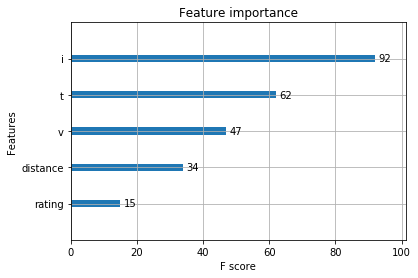

In [44]:
xgb.plot_importance(bst1)

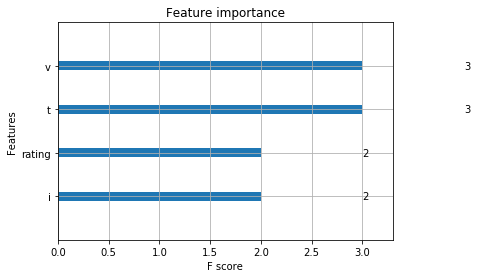

In [45]:
xgb.plot_importance(bst2)

In [47]:
bst3 = xgb.train(param, d_X, param['num_round'], evallist)

[0]	eval-error:0.16	train-error:0.23
[1]	eval-error:0.18	train-error:0.2
[2]	eval-error:0.16	train-error:0.23
[3]	eval-error:0.14	train-error:0.2


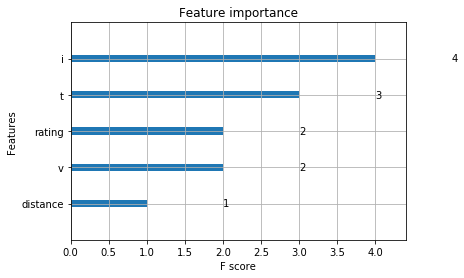

In [48]:
xgb.plot_importance(bst3)

In [49]:
accuracy_score((bst1.predict(d_X)>=0.5).astype(int),y)

0.9

In [50]:
accuracy_score((bst2.predict(d_X)>=0.5).astype(int),y)

0.8

In [51]:
accuracy_score((bst3.predict(d_X)>=0.5).astype(int),y)

0.82

In [393]:
# bst.save_model('xgb.model')

# # load model and data in

# bst2 = xgb.Booster(model_file='xgb.model')

In [531]:
submission = pd.Series((bst.predict(data_xgb)>=0.5).astype(int)).map({0:'car', 1:'bus'})

In [533]:
submission.count()

13

In [534]:
submission.to_csv('subm.csv', index=None)

In [535]:
pd.read_csv('subm.csv', header=None, nrows=3)

,0
0,car
1,car
2,bus


In [ ]:
# Посмотрим, в чем сложности

In [57]:
bus_not_car = (X['y_pred'] == 1) & (X['y'] == 0)

In [58]:
car_not_bus = (X['y_pred'] == 0) & (X['y'] == 1)

In [59]:
bus = X['y'] == 1
car = X['y'] == 0

Text(0,0.5,'distance')

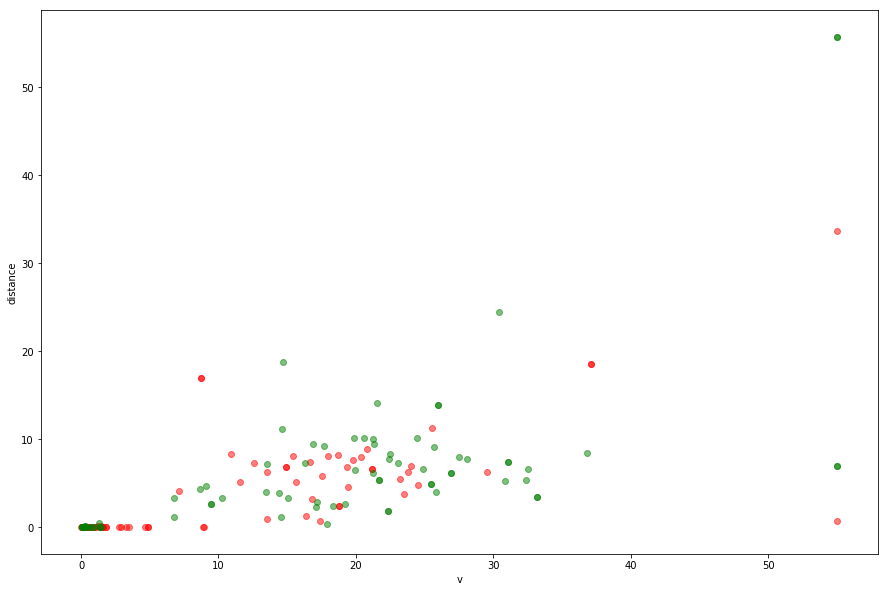

In [70]:
plt.figure(figsize=(15,10))
#plt.scatter(X['v'].clip(0,145),X['t'], alpha=0.3)
plt.scatter(X.loc[bus,'v'].clip(0,55),X.loc[bus,'distance'], alpha=0.5, c='r')
plt.scatter(X.loc[car,'v'].clip(0,55),X.loc[car,'distance'], alpha=0.5, c='g')
plt.xlabel('v')
plt.ylabel('distance')

Text(0,0.5,'distance')

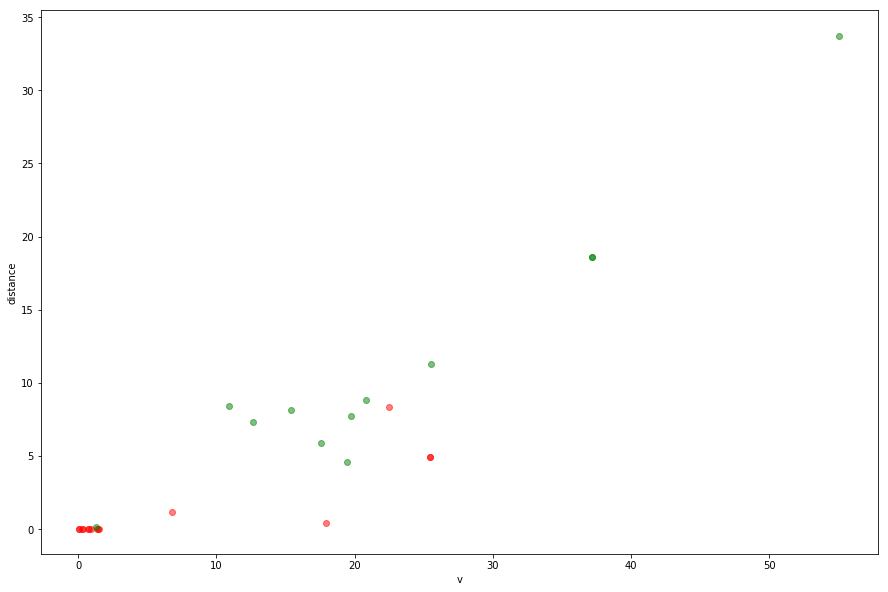

In [69]:
plt.figure(figsize=(15,10))
#plt.scatter(X['v'].clip(0,145),X['t'], alpha=0.3)
plt.scatter(X.loc[bus_not_car,'v'].clip(0,55),X.loc[bus_not_car,'distance'], alpha=0.5, c='r')
plt.scatter(X.loc[car_not_bus,'v'].clip(0,55),X.loc[car_not_bus,'distance'], alpha=0.5, c='g')
plt.xlabel('v')
plt.ylabel('distance')

In [73]:
from sklearn.metrics import confusion_matrix

In [75]:
confusion_matrix(bst3.predict(d_X)>=0.5, y)

array([[62, 12],
       [15, 61]], dtype=int64)